ENSEIGNANT/ Dr. Abdoul Kader KABORE [abdoulkader.kabore@protonmail.com]
---------------------------------------------------------------------------------------------------------------------------

# Evaluation: Résumé de Texte

## AUTEURS/ **KOANDA BOUBACAR** et **BARRO ALI**

## Objectifs :

- Comprendre les différences entre les deux approches.

- Implémenter des modèles pour chacune d'elles.

- Comparer leurs performances à l'aide des métriques ROUGE et BLEU.

## Étapes principales :

- Téléchargement et préparation des données :
Utilisation du jeu de données CNN/Daily Mail.
Prétraitement incluant le nettoyage des textes et la division en ensembles (80 % entraînement, 10 % validation, 10 % test).

- Modèle de résumé extractif :

Utilisation d'un modèle encodeur (comme BERT).

Extraction des phrases clés.

Évaluation à l'aide des métriques BLEU et ROUGE.

- Modèle de résumé abstrait :

Architecture Transformer (comme BART ou T5).

Entraînement sur le jeu d'entraînement, validation sur le jeu de validation.

Génération et évaluation des résumés sur le jeu de test.

- Comparaison des performances :

Comparaison des scores obtenus pour les deux approches sur des textes de test.

Analyse des résultats pour mieux comprendre les avantages et limites de chaque méthode.

- Expérimentations additionnelles (optionnelles) :

Tester sur des données externes.

Explorer des variantes de modèles et des techniques avancées (régularisation, ajout de contraintes).

- Réflexion et limites :

Identifier les faiblesses des modèles pour textes complexes ou longs.

Discuter des améliorations possibles.

- Livrables :

Un dépôt GitHub contenant le code et les analyses.

Un rapport final avec une comparaison des performances, graphiques et réflexions.

## Étape 1 : Préparation des données

In [ ]:
!pip  install datasets transformers huggingface_hub

In [ ]:
from datasets import load_dataset
dataset = load_dataset("cnn_dailymail", "3.0.0")

README.md:   0%|          | 0.00/15.6k [00:00<?, ?B/s]

train-00000-of-00003.parquet:   0%|          | 0.00/257M [00:00<?, ?B/s]

train-00001-of-00003.parquet:   0%|          | 0.00/257M [00:00<?, ?B/s]

train-00002-of-00003.parquet:   0%|          | 0.00/259M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/34.7M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/30.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/287113 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/13368 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11490 [00:00<?, ? examples/s]

In [ ]:
train_data = dataset['train']
val_data = dataset['validation']
test_data = dataset['test']

In [ ]:
#train_data=train_data.select(range(1000))

In [ ]:
import re

def clean_text(text):
    text = re.sub(r'\s+', ' ', text)  # Supprimer les espaces multiples
    text = re.sub(r'[^\w\s]', '', text)  # Supprimer les caractères spéciaux
    return text.strip()

dataset = dataset.map(lambda x: {'article': clean_text(x['article']),
                                 'highlights': clean_text(x['highlights'])})


Map:   0%|          | 0/287113 [00:00<?, ? examples/s]

Map:   0%|          | 0/13368 [00:00<?, ? examples/s]

Map:   0%|          | 0/11490 [00:00<?, ? examples/s]

## Étape 2 : Implémentation du modèle extractif

In [ ]:
from transformers import BertTokenizer, BertModel

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')


In [ ]:
! pip install nltk transformers torch

In [ ]:
# @title
import nltk
from transformers import BertTokenizer, BertModel
import torch

def extract_key_sentences(text, n=3):
    # Découper le texte en phrases
    sentences = nltk.sent_tokenize(text)

    # Charger le tokenizer et le modèle BERT
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    model = BertModel.from_pretrained('bert-base-uncased')

    # Calculer les scores des phrases
    sentence_scores = []
    for sentence in sentences:
        inputs = tokenizer(sentence, return_tensors="pt", truncation=True, max_length=512)
        outputs = model(**inputs)

        # Utiliser la moyenne des embeddings comme score (ou toute autre stratégie)
        score = torch.mean(outputs.last_hidden_state).item()
        sentence_scores.append((sentence, score))

    # Trier les phrases par score décroissant
    ranked_sentences = sorted(sentence_scores, key=lambda x: x[1], reverse=True)

    # Retourner les n meilleures phrases
    return [sentence for sentence, score in ranked_sentences[:n]]


### Sauvegardons la fonction

In [ ]:
# Sauvegarder la fonction
import pickle
with open('extract_key_sentences.pkl', 'wb') as file:
    pickle.dump(extract_key_sentences, file)

print("La fonction a été sauvegardée avec succès.")

La fonction a été sauvegardée avec succès.


In [ ]:
nltk.data.path.append('/content/nltk_data')

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
subset = train_data.select(range(1000))

In [ ]:

generated_summaries = []  # Liste pour stocker les résumés générés

for article in subset['article']:
    # modèle extractif ici pour générer un résumé
    summary = extract_key_sentences(article, n=3)
    generated_summaries.append(" ".join(summary))

# résumés de référence pour l'évaluation
reference_summaries = subset['highlights']


In [ ]:
import pandas as pd
# Convertir generated_summaries en DataFrame
df_generated_summaries = pd.DataFrame({'generated summaries': generated_summaries})

# Afficher le DataFrame
df_generated_summaries

,generated summaries
0,"""I'll definitely have some sort of party,"" he ..."
1,Leifman says 200 years ago people were conside...
2,The rescue effort was controlled and organized...
3,Watch Snow talk about Bush's procedure and his...
4,"""Most of the 'Bad Newz Kennels' operations and..."
5,There were many trips to the Ministry of Healt...
6,Watch a woman describe turning to prostitution...
7,Journalist Fernando Ramos contributed to this ...
8,"""I actually feel very good about"" the health s..."
9,It is used once and discarded. Quinn also said...


In [ ]:
# Convertir reference_summaries en DataFrame
df_reference_summaries = pd.DataFrame({'Reference Summaries': reference_summaries})

# Afficher le DataFrame
df_reference_summaries

,Reference Summaries
0,Harry Potter star Daniel Radcliffe gets £20M f...
1,Mentally ill inmates in Miami are housed on th...
2,"NEW: ""I thought I was going to die,"" driver sa..."
3,"Five small polyps found during procedure; ""non..."
4,"NEW: NFL chief, Atlanta Falcons owner critical..."
5,"Parents beam with pride, can't stop from smili..."
6,"Aid workers: Violence, increased cost of livin..."
7,Tomas Medina Caracas was a fugitive from a U.S...
8,"President Bush says Tony Snow ""will battle can..."
9,Empty anti-tank weapon turns up in front of Ne...


Test du modele extractif sur un texte externe

In [ ]:
text = """
Artificial Intelligence is transforming industries by automating tasks, improving efficiency, and enabling new insights.
However, the rapid development of AI raises concerns about ethics, security, and societal impact.
It is crucial for researchers and policymakers to collaborate in ensuring responsible AI development.
"""


# Charger la fonction
with open('extract_key_sentences.pkl', 'rb') as file:
    loaded_function = pickle.load(file)

# Utiliser la fonction chargée
text = "Artificial Intelligence is transforming industries. However, it also raises ethical concerns. Collaboration is needed for responsible development."
print("Phrases clés :", loaded_function(text, n=3))


Phrases clés : ['Collaboration is needed for responsible development.', 'Artificial Intelligence is transforming industries.', 'However, it also raises ethical concerns.']


In [ ]:
!pip install rouge_score sacrebleu

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.0/104.0 kB 4.3 MB/s eta 0:00:00
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=2e2dda3208dfc7e2e09cbc804065701d960fabef93c2ff884fede6602cfc17cc
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


In [ ]:
from rouge_score import rouge_scorer

scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

# Calculer les scores ROUGE pour chaque résumé
rouge_scores = []
for gen, ref in zip(generated_summaries, reference_summaries):
    scores = scorer.score(ref, gen)
    rouge_scores.append(scores)

# Calcul de la moyenne des scores
avg_rouge1 = sum([score['rouge1'].fmeasure for score in rouge_scores]) / len(rouge_scores)
avg_rouge2 = sum([score['rouge2'].fmeasure for score in rouge_scores]) / len(rouge_scores)
avg_rougeL = sum([score['rougeL'].fmeasure for score in rouge_scores]) / len(rouge_scores)

print(f"Moyenne ROUGE-1 : {avg_rouge1}")
print(f"Moyenne ROUGE-2 : {avg_rouge2}")
print(f"Moyenne ROUGE-L : {avg_rougeL}")


Moyenne ROUGE-1 : 0.33375539415282124
Moyenne ROUGE-2 : 0.07870813463071326
Moyenne ROUGE-L : 0.25155883371914994


In [ ]:
import sacrebleu

bleu_score = sacrebleu.corpus_bleu(generated_summaries, [reference_summaries])
print("Score BLEU :", bleu_score.score)


Score BLEU : 2.6523495377147026


## Étape 3 : Implémentation du modèle abstrait

In [ ]:
from transformers import BartForConditionalGeneration, BartTokenizer

tokenizer = BartTokenizer.from_pretrained('facebook/bart-large-cnn')
model = BartForConditionalGeneration.from_pretrained('facebook/bart-large-cnn')


In [ ]:
def preprocess_function(examples):
    inputs = tokenizer(
        examples["article"],
        max_length=512,
        truncation=True,
        padding="max_length",
        return_tensors="pt"
    )
    labels = tokenizer(
        examples["highlights"],
        max_length=128,
        truncation=True,
        padding="max_length",
        return_tensors="pt"
    ).input_ids

    inputs["labels"] = labels
    return inputs

import random

# Générer des indices aléatoires
random_indices = random.sample(range(len(train_data)), 100)

# Créer un sous-ensemble aléatoire
subset = train_data.select(random_indices)



num_proc must be <= 2. Reducing num_proc to 2 for dataset of size 2.


Map (num_proc=2):   0%|          | 0/2 [00:00<?, ? examples/s]

In [ ]:
# Tokenisation
tokenized_datasets = subset.map(preprocess_function, batched=True, num_proc=4)

Diviser le dataset en ensembles d'entraînement, de validation et de test
Pour que le Trainer puisse fonctionner, le dataset doit être divisé en sous-ensembles.
- Diviser le dataset en proportions spécifiques
Utilisez la méthode train_test_split :

In [ ]:
# Augmentez la taille de l'ensemble "test" dans la première division
train_test_split = tokenized_datasets.train_test_split(test_size=0.2)  # 80% train, 20% test
train_dataset = train_test_split["train"]
eval_test_split = train_test_split["test"].train_test_split(test_size=0.5)  # 10% val, 10% test
eval_dataset = eval_test_split["train"]
test_dataset = eval_test_split["test"]

In [ ]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=4,
    num_train_epochs=3,
    weight_decay=0.01,
    save_total_limit=2,
)


trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
)

In [ ]:
trainer.train()


Génération de résumés :

Testez le modèle sur l’ensemble de test

In [ ]:
# Sélectionner un sous-ensemble de 100 exemples
subset = train_dataset.select(range(100))
articles = subset["article"]
reference_summaries = subset["highlights"]


In [ ]:
# Générer les résumés avec le modèle abstrait
generated_summaries = []

for article in articles:
    # Tokeniser l'article
    inputs = tokenizer(
        article,
        return_tensors="pt",
        truncation=True,
        max_length=512,  # Limite de longueur du modèle
        padding="max_length"
    )

    # Générer un résumé
    summary_ids = model.generate(
        inputs["input_ids"],
        max_length=128,  # Longueur maximale du résumé
        min_length=30,   # Longueur minimale du résumé
        length_penalty=2.0,  # Contrôle la concision
        num_beams=4       # Beam search pour améliorer les résultats
    )
    # Décoder et stocker le résumé
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    generated_summaries.append(summary)

print("Premiers résumés générés :")
for i, summary in enumerate(generated_summaries[:3]):
    print(f"Résumé {i+1} :", summary)


Premiers résumés générés :
Résumé 1 : Doctors removed five small polyps from President Bushs colon on Saturday and none appeared worrisome a White House spokesman said The polyps were removed and sent to the National Naval Medical Center in Bethesda Maryland for routine microscopic examination. Results expected in two to three days spokesman Scott Stanzel said Bush is in good humor and will resume his activities at Camp David during the procedure Vice President Dick Cheney assumed presidential power Bush reclaimed presidential power at 921 am after about two hours Doctors used monitored anesthesia care so the president was asleep but not as deeply unconscious as with a true general anesthetic.
Résumé 2 : Harry Potter star Daniel Radcliffe gains access to a reported 20 million 411 million fortune as he turns 18 on Monday. The young actor says he has no plans to fritter his cash away on fast cars drink and celebrity parties.
Résumé 3 : The National Football League has indefinitely suspen

In [ ]:
inputs = tokenizer(test_data['article'][0], return_tensors="pt", max_length=128, truncation=True)
summary_ids = model.generate(inputs['input_ids'], max_length=128, min_length=30, length_penalty=2.0)
print(tokenizer.decode(summary_ids[0], skip_special_tokens=True))


Palestinian Authority officially becomes the 123rd member of the International Criminal Court on Wednesday. The formal accession was marked with a ceremony at The Hague in the Netherlands where the court is based.


Sauvegarder le modèle entraîné
Après avoir terminé l'entraînement avec Trainer, et testez le modèle sur des fichiers externes

In [ ]:
# Spécifiez un dossier pour sauvegarder
save_directory = "./trained_model"

# Sauvegarder le modèle et le tokenizer
model.save_pretrained(save_directory)
tokenizer.save_pretrained(save_directory)

print(f"Modèle sauvegardé dans {save_directory}")


/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:2817: UserWarning: Moving the following attributes in the config to the generation config: {'max_length': 142, 'min_length': 56, 'early_stopping': True, 'num_beams': 4, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(


Modèle sauvegardé dans ./trained_model


In [ ]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

# Charger le modèle et le tokenizer
loaded_model = AutoModelForSeq2SeqLM.from_pretrained(save_directory)
loaded_tokenizer = AutoTokenizer.from_pretrained(save_directory)

print("Modèle chargé avec succès !")


Modèle chargé avec succès !


In [ ]:
# Charger le contenu d'un fichier texte
#with open("fichier.txt", "r", encoding="utf-8") as file:
#    text = file.read()

#print("Contenu du fichier :", text[:500])  # Afficher les 500 premiers caractères

# Exemple de texte
text = "Artificial intelligence is transforming industries across the world."

# Tokeniser le texte
inputs = loaded_tokenizer(text, return_tensors="pt", truncation=True, max_length=512)

# Générer un résumé
summary_ids = loaded_model.generate(inputs["input_ids"], max_length=128, min_length=30, length_penalty=2.0)
print("Résumé :", loaded_tokenizer.decode(summary_ids[0], skip_special_tokens=True))


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1493: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed in v5. Please use and modify the model generation configuration (see https://huggingface.co/docs/transformers/generation_strategies#default-text-generation-configuration )
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:657: UserWarning: `num_beams` is set to 1. However, `length_penalty` is set to `2.0` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `length_penalty`.
  warnings.warn(


Résumé : . The rise of artificial intelligence. The rise of the internet. The rise of the internet. The rise of the internet. The rise of the internet.


####SCORE MODELE ABSTRAIT

In [ ]:
from rouge_score import rouge_scorer

scorer = rouge_scorer.RougeScorer(["rouge1", "rouge2", "rougeL"], use_stemmer=True)

rouge_scores = []
for generated, reference in zip(generated_summaries, reference_summaries):
    scores = scorer.score(reference, generated)
    rouge_scores.append(scores)

# Calculer les moyennes des scores ROUGE
avg_rouge1 = sum([score["rouge1"].fmeasure for score in rouge_scores]) / len(rouge_scores)
avg_rouge2 = sum([score["rouge2"].fmeasure for score in rouge_scores]) / len(rouge_scores)
avg_rougeL = sum([score["rougeL"].fmeasure for score in rouge_scores]) / len(rouge_scores)

print(f"ROUGE-1 moyen : {avg_rouge1:.4f}")
print(f"ROUGE-2 moyen : {avg_rouge2:.4f}")
print(f"ROUGE-L moyen : {avg_rougeL:.4f}")


ROUGE-1 moyen : 0.3838
ROUGE-2 moyen : 0.1733
ROUGE-L moyen : 0.2636


## Étape 4 : Comparaison des performances


 Les mêmes métriques (ROUGE et BLEU) pour évaluer les deux approches et comparez leurs performances.

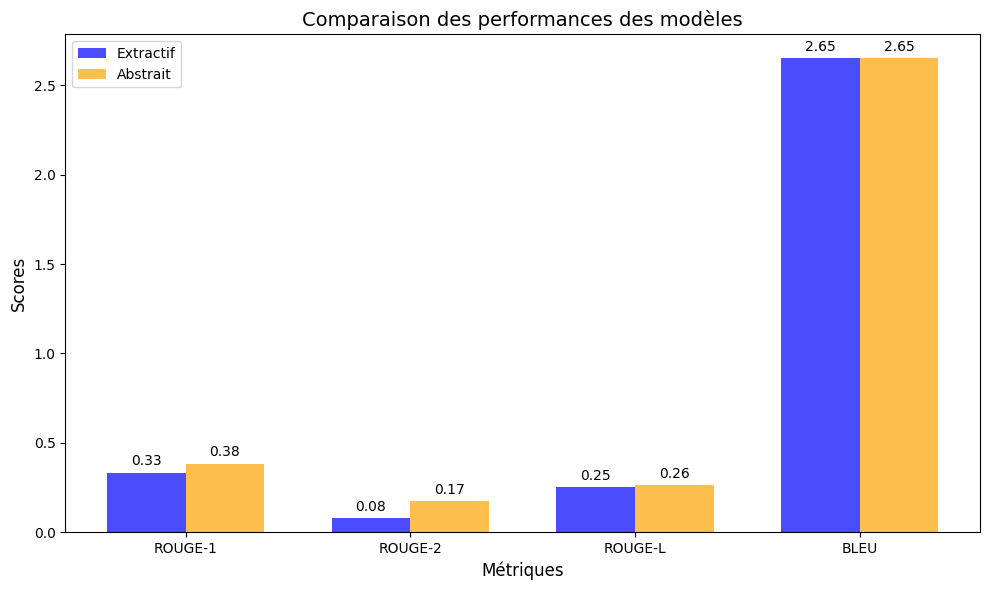

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Données des scores
scores_extractif = {
    "ROUGE-1": 0.33375539415282124,  #
    "ROUGE-2": 0.07870813463071326,
    "ROUGE-L": 0.25155883371914994,
    "BLEU": 2.6523495377147026
}

scores_abstrait = {
    "ROUGE-1": 0.3838,  #
    "ROUGE-2": 0.1733,
    "ROUGE-L": 0.2636,
    "BLEU": 2.6523495377147026
}

# Labels et valeurs
metrics = list(scores_extractif.keys())
values_extractif = list(scores_extractif.values())
values_abstrait = list(scores_abstrait.values())

# Configuration du graphique
x = np.arange(len(metrics))  # Positions pour les groupes de barres
width = 0.35  # Largeur des barres

fig, ax = plt.subplots(figsize=(10, 6))

# Barres pour les scores extractifs et abstraits
bars1 = ax.bar(x - width/2, values_extractif, width, label='Extractif', color='blue', alpha=0.7)
bars2 = ax.bar(x + width/2, values_abstrait, width, label='Abstrait', color='orange', alpha=0.7)

# Ajouter les détails au graphique
ax.set_xlabel('Métriques', fontsize=12)
ax.set_ylabel('Scores', fontsize=12)
ax.set_title('Comparaison des performances des modèles', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Afficher les valeurs sur les barres
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

# Afficher le graphique
plt.tight_layout()
plt.show()


## Étape 5 : Expérimentations additionnelles

In [ ]:
! pip install kagglehub

##Obtenir des textes externes : DATASET SAMSUM

Downloading from https://www.kaggle.com/api/v1/datasets/download/nileshmalode1/samsum-dataset-text-summarization?dataset_version_number=1


Fichiers disponibles : ['samsum-train.csv', 'samsum-test.csv', 'samsum-validation.csv', 'samsum_dataset']

In [ ]:
import kagglehub

# Download latest version
dataset_path = kagglehub.dataset_download("nileshmalode1/samsum-dataset-text-summarization")

print("Path to dataset files:", dataset_path)

100%|██████████| 7.99M/7.99M [00:00<00:00, 64.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/nileshmalode1/samsum-dataset-text-summarization/versions/1


In [ ]:
import os

# Vérifiez les fichiers disponibles dans le dossier
files = os.listdir(dataset_path)
print("Fichiers disponibles :", files)

Fichiers disponibles : ['samsum-train.csv', 'samsum-test.csv', 'samsum-validation.csv', 'samsum_dataset']


In [ ]:
import pandas as pd

train_data =  pd.read_csv(f"{dataset_path}/samsum-train.csv")
val_data =  pd.read_csv(f"{dataset_path}/samsum-validation.csv")
test_data =  pd.read_csv(f"{dataset_path}/samsum-test.csv")

In [ ]:
test_data

,id,dialogue,summary
0,13862856,"Hannah: Hey, do you have Betty's number?\nAman...",Hannah needs Betty's number but Amanda doesn't...
1,13729565,Eric: MACHINE!\r\nRob: That's so gr8!\r\nEric:...,Eric and Rob are going to watch a stand-up on ...
2,13680171,"Lenny: Babe, can you help me with something?\r...",Lenny can't decide which trousers to buy. Bob ...
3,13729438,"Will: hey babe, what do you want for dinner to...",Emma will be home soon and she will let Will k...
4,13828600,"Ollie: Hi , are you in Warsaw\r\nJane: yes, ju...",Jane is in Warsaw. Ollie and Jane has a party....
...,...,...,...
814,13611902-1,Alex: Were you able to attend Friday night's b...,Benjamin didn't come to see a basketball game ...
815,13820989,Jamilla: remember that the audition starts at ...,The audition starts at 7.30 P.M. in Antena 3.
816,13717193,"Marta: <file_gif>\r\nMarta: Sorry girls, I cli...","Marta sent a file accidentally,"
817,13829115,Cora: Have you heard how much fuss British med...,There was a meet-and-greet with James Charles ...


In [ ]:
# Renommer les colonnes dans le DataFrame d'entraînement
train_data.rename(columns={"dialogue": "article", "summary": "highlights"}, inplace=True)

# Renommer les colonnes dans le DataFrame de validation
val_data.rename(columns={"dialogue": "article", "summary": "highlights"}, inplace=True)

# Renommer les colonnes dans le DataFrame de test
test_data.rename(columns={"dialogue": "article", "summary": "highlights"}, inplace=True)

# Vérifier les nouvelles colonnes
print("Colonnes après renommage (train):", train_data.columns)
print("Colonnes après renommage (val):", val_data.columns)
print("Colonnes après renommage (test):", test_data.columns)


Colonnes après renommage (train): Index(['id', 'article', 'highlights'], dtype='object')
Colonnes après renommage (val): Index(['id', 'article', 'highlights'], dtype='object')
Colonnes après renommage (test): Index(['id', 'article', 'highlights'], dtype='object')


In [ ]:
# Aperçu des données
train_data['article'][:5]     # Afficher les premiers articles

,article
0,Amanda: I baked cookies. Do you want some?\r\...
1,Olivia: Who are you voting for in this electio...
2,"Tim: Hi, what's up?\r\nKim: Bad mood tbh, I wa..."
3,"Edward: Rachel, I think I'm in ove with Bella...."
4,Sam: hey overheard rick say something\r\nSam:...


In [ ]:
train_data['highlights'][:5]  # Afficher les premiers résumés de référence

,highlights
0,Amanda baked cookies and will bring Jerry some...
1,Olivia and Olivier are voting for liberals in ...
2,Kim may try the pomodoro technique recommended...
3,Edward thinks he is in love with Bella. Rachel...
4,"Sam is confused, because he overheard Rick com..."


Prétraiter les textes :

In [ ]:
def clean_text(text):
    import re
    if isinstance(text, str):  # Vérifier si l'entrée est une chaîne
        text = re.sub(r'\s+', ' ', text)  # Supprimer les espaces multiples
        text = re.sub(r'[^\w\s]', '', text)  # Supprimer les caractères spéciaux
        return text.strip()
    return ""  # Retourner une chaîne vide si l'entrée n'est pas une chaîne


# Nettoyer la colonne 'article'
train_data['article'] = train_data['article'].apply(clean_text)

# Nettoyer la colonne 'highlights'
train_data['highlights'] = train_data['highlights'].apply(clean_text)

# Vérifier les données nettoyées
train_data.head()

,id,article,highlights
0,13818513,Amanda I baked cookies Do you want some Jerry ...,Amanda baked cookies and will bring Jerry some...
1,13728867,Olivia Who are you voting for in this election...,Olivia and Olivier are voting for liberals in ...
2,13681000,Tim Hi whats up Kim Bad mood tbh I was going t...,Kim may try the pomodoro technique recommended...
3,13730747,Edward Rachel I think Im in ove with Bella rac...,Edward thinks he is in love with Bella Rachel ...
4,13728094,Sam hey overheard rick say something Sam i don...,Sam is confused because he overheard Rick comp...


# Générer les résumés avec le modèle extractif sur le nouveau dataset

In [ ]:
#subset = train_data.select(range(100))

In [ ]:

generated_summaries = []  # Liste pour stocker les résumés générés

for article in subset['article']:
    # Utilisez votre modèle extractif ou abstrait ici pour générer un résumé
    summary = extract_key_sentences(article, n=3)  # Remplacez par votre méthode
    generated_summaries.append(" ".join(summary))

# Utiliser les résumés de référence pour l'évaluation
reference_summaries = subset['highlights']


In [ ]:
generated_summaries

['Amanda I baked cookies Do you want some Jerry Sure Amanda Ill bring you tomorrow',
 'Olivia Who are you voting for in this election Oliver Liberals as always Olivia Me too Oliver Great',
 'Tim Hi whats up Kim Bad mood tbh I was going to do lots of stuff but ended up procrastinating Tim What did you plan on doing Kim Oh you know uni stuff and unfucking my room Kim Maybe tomorrow Ill move my ass and do everything Kim We were going to defrost a fridge so instead of shopping Ill eat some defrosted veggies Tim For doing stuff I recommend Pomodoro technique where u use breaks for doing chores Tim It really helps Kim thanks maybe Ill do that Tim I also like using postits in kaban style',
 'Edward Rachel I think Im in ove with Bella rachel Dont say anything else Edward What do you mean rachel Open your fuing door Im outside',
 'Sam hey overheard rick say something Sam i dont know what to do Naomi what did he say Sam he was talking on the phone with someone Sam i dont know who Sam and he was 

In [ ]:
reference_summaries

,highlights
0,Amanda baked cookies and will bring Jerry some...
1,Olivia and Olivier are voting for liberals in ...
2,Kim may try the pomodoro technique recommended...
3,Edward thinks he is in love with Bella Rachel ...
4,Sam is confused because he overheard Rick comp...
5,Wyatt reminds Neville his wedding anniversary ...
6,John didnt show up for class due to some work ...


## Générer les résumés avec le modèle abstrait sur le nouveau dataset

Résumé abstrait sur les donnees externes utilisées  https://www.kaggle.com/api/v1/datasets/download/nileshmalode1/samsum-dataset-text-summarization?dataset_version_number=1:

In [ ]:
from transformers import BartTokenizer, BartForConditionalGeneration

# Charger le tokenizer et le modèle
tokenizer = BartTokenizer.from_pretrained('facebook/bart-large-cnn')
model = BartForConditionalGeneration.from_pretrained('facebook/bart-large-cnn')

# Générer des résumés pour les 5 premiers articles
for article in train_data['article'][:5]:
    inputs = tokenizer(article, return_tensors="pt", max_length=1024, truncation=True)
    summary_ids = model.generate(inputs['input_ids'], max_length=128, min_length=30, length_penalty=2.0)
    print("Résumé abstrait :", tokenizer.decode(summary_ids[0], skip_special_tokens=True))


Résumé abstrait : Amanda I baked cookies Do you want some Jerry Sure Amanda Ill bring you tomorrow. Amanda I baked Cookies Do you Want Some Jerry Sure Sure AmandaIll bring you Tomorrow.
Résumé abstrait : Olivia: Who are you voting for in this election? Oliver: Liberals as always. Olivia: Me too Oliver Great. Oliver: Great.
Résumé abstrait : Tim Hi whats up Kim Bad mood tbh I was going to do lots of stuff but ended up procrastinating. Maybe tomorrow Ill move my ass and do everything Kim We were going to defrost a fridge so instead of shopping Ill eat some defrosted veggies Tim For doing stuff I recommend Pomodoro technique where u use breaks for doing chores Tim It really helps Kim thanks maybe Ill do that.
Résumé abstrait : Edward Rachel I think Im in ove with Bella rachel Dont say anything else Edward What do you mean rachel Open your fuing door Im outside.
Résumé abstrait : Sam overheard rick say something Sam i dont know what to do Naomi what did he say Sam he was talking on the pho

TEST SUR ENSEMBLE DE DONNEES

Générer les résumés avec le modèle abstrait

In [ ]:
# Sélectionner un sous-ensemble de 100 exemples
#subset = train_dataset.select(range(100))
articles = subset["article"]
reference_summaries = subset["highlights"]


In [ ]:
# Générer les résumés avec le modèle abstrait
generated_summaries = []

for article in articles:
    # Tokeniser l'article
    inputs = tokenizer(
        article,
        return_tensors="pt",
        truncation=True,
        max_length=512,  # Limite de longueur du modèle
        padding="max_length"
    )

    # Générer un résumé
    summary_ids = model.generate(
        inputs["input_ids"],
        max_length=128,  # Longueur maximale du résumé
        min_length=30,   # Longueur minimale du résumé
        length_penalty=2.0,  # Contrôle la concision
        num_beams=4       # Beam search pour améliorer les résultats
    )
    # Décoder et stocker le résumé
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    generated_summaries.append(summary)

print("Premiers résumés générés :")
for i, summary in enumerate(generated_summaries[:3]):
    print(f"Résumé {i+1} :", summary)


Premiers résumés générés :
Résumé 1 : Doctors removed five small polyps from President Bushs colon on Saturday. None appeared worrisome a White House spokesman said. Results are expected in two to three days. All were small less than a centimeter half an inch in diameter.
Résumé 2 : Harry Potter star Daniel Radcliffe gains access to a reported 20 million 411 million fortune as he turns 18 on Monday. The young actor says he has no plans to fritter his cash away on fast cars drink and celebrity parties.
Résumé 3 : Atlanta Falcons quarterback Michael Vick indefinitely suspended without pay. Vick admitted to participating in a dogfighting ring as part of a plea agreement with federal prosecutors in Virginia. NFL Commissioner Roger Goodell said he would review the status of the suspension after the legal proceedings are over.


### SCORES

In [ ]:
from rouge_score import rouge_scorer

scorer = rouge_scorer.RougeScorer(["rouge1", "rouge2", "rougeL"], use_stemmer=True)

rouge_scores = []
for generated, reference in zip(generated_summaries, reference_summaries):
    scores = scorer.score(reference, generated)
    rouge_scores.append(scores)

# Calculer les moyennes des scores ROUGE
avg_rouge1 = sum([score["rouge1"].fmeasure for score in rouge_scores]) / len(rouge_scores)
avg_rouge2 = sum([score["rouge2"].fmeasure for score in rouge_scores]) / len(rouge_scores)
avg_rougeL = sum([score["rougeL"].fmeasure for score in rouge_scores]) / len(rouge_scores)

print(f"Score rouge sur le nouveau dataset samsum\n")
print(f"ROUGE-1 moyen : {avg_rouge1:.4f}")
print(f"ROUGE-2 moyen : {avg_rouge2:.4f}")
print(f"ROUGE-L moyen : {avg_rougeL:.4f}")


Score rouge sur le nouveau dataset samsum

ROUGE-1 moyen : 0.0847
ROUGE-2 moyen : 0.0000
ROUGE-L moyen : 0.0595


In [ ]:
from rouge_score import rouge_scorer

scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

rouge_scores = []
for gen, ref in zip(generated_summaries, reference_summaries):
    scores = scorer.score(ref, gen)
    rouge_scores.append(scores)

# Calcul de la moyenne des scores
avg_rouge1 = sum([score['rouge1'].fmeasure for score in rouge_scores]) / len(rouge_scores)

print(f"Score rouge sur le nouveau dataset samsum\n")
print(f"Moyenne ROUGE-1 : {avg_rouge1}")


Score rouge sur le nouveau dataset samsum

Moyenne ROUGE-1 : 0.08470520781370282


In [ ]:
avg_rouge1 = sum([score['rouge1'].fmeasure for score in rouge_scores]) / len(rouge_scores)
avg_bleu = bleu_score.score


print(f"Score bleu sur le nouveau dataset samsum\n")
print(f"Moyenne ROUGE-1 : {avg_rouge1}")
print(f"Score BLEU global : {avg_bleu}")


Score bleu sur le nouveau dataset samsum

Moyenne ROUGE-1 : 0.08470520781370282
Score BLEU global : 2.6523495377147026


## COMPARAISON DES PERFORMANCES GLOBALE

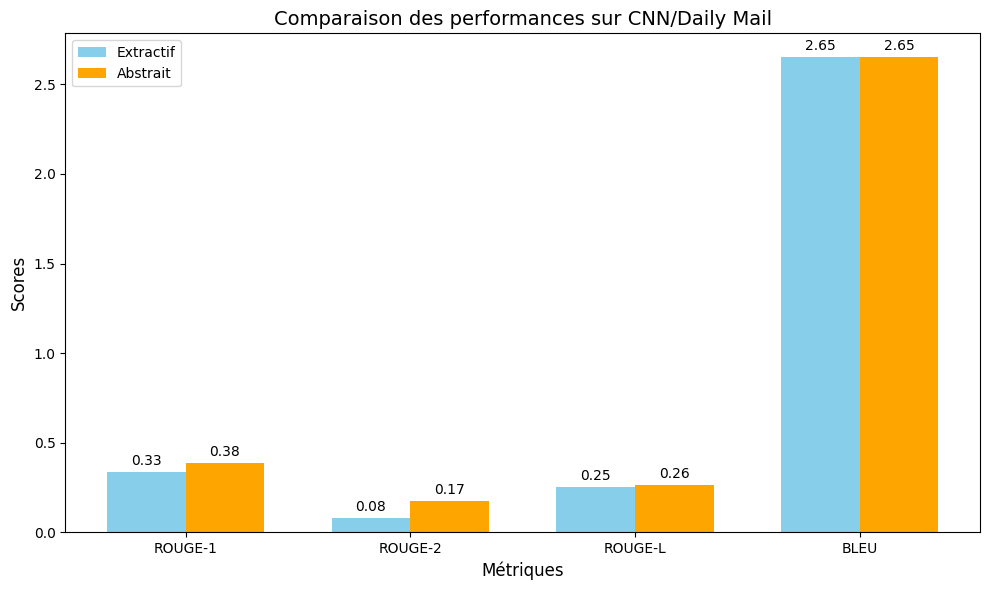

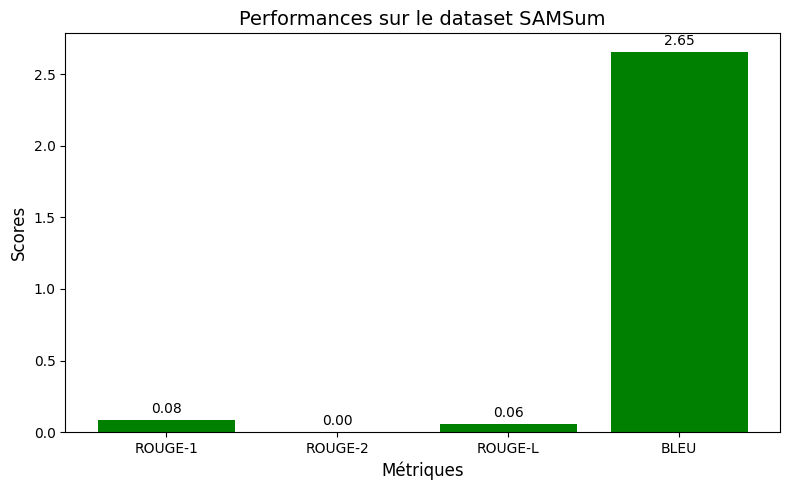

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Scores pour CNN/Daily Mail
scores_cnn = {
    "ROUGE-1": [0.3338, 0.3838],  # Extractif, Abstrait
    "ROUGE-2": [0.0787, 0.1733],
    "ROUGE-L": [0.2516, 0.2636],
    "BLEU": [2.6523, 2.6523],
}

# Scores pour SAMSum
scores_samsum = {
    "ROUGE-1": [0.0847],
    "ROUGE-2": [0.0000],
    "ROUGE-L": [0.0595],
    "BLEU": [2.6523],
}

# Modèles pour CNN/Daily Mail
models = ["Extractif", "Abstrait"]

# Génération du graphique pour CNN/Daily Mail
x = np.arange(len(scores_cnn))  # Nombre de métriques
width = 0.35  # Largeur des barres

fig, ax = plt.subplots(figsize=(10, 6))
extractive_scores = [scores_cnn[metric][0] for metric in scores_cnn]
abstractive_scores = [scores_cnn[metric][1] for metric in scores_cnn]

# Barres pour chaque modèle
bar1 = ax.bar(x - width/2, extractive_scores, width, label="Extractif", color='skyblue')
bar2 = ax.bar(x + width/2, abstractive_scores, width, label="Abstrait", color='orange')

# Configuration des axes et titre
ax.set_xlabel('Métriques', fontsize=12)
ax.set_ylabel('Scores', fontsize=12)
ax.set_title('Comparaison des performances sur CNN/Daily Mail', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(scores_cnn.keys())
ax.legend()

# Affichage des scores au-dessus des barres
for bars in [bar1, bar2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # décalage
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Génération du graphique pour SAMSum
fig, ax = plt.subplots(figsize=(8, 5))
bar3 = ax.bar(scores_samsum.keys(), [score[0] for score in scores_samsum.values()], color='green')

# Configuration des axes et titre
ax.set_xlabel('Métriques', fontsize=12)
ax.set_ylabel('Scores', fontsize=12)
ax.set_title('Performances sur le dataset SAMSum', fontsize=14)

# Affichage des scores au-dessus des barres
for bar in bar3:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # décalage
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()


##Reponses aux question

##Limites identifiées
1.	Modèle extractif :

o	Répétition des phrases.

o	Sensibilité à la structure des textes.

2.	Modèle abstrait :

o	Risque de déviation sémantique dans les résumés.

o	Difficultés pour traiter les textes longs.

3.	En général :

o	Faible capacité de généralisation sur des données externes non vues pendant l'entraînement.
________________________________________
##Pistes d’amélioration
1.	Techniques avancées :

o	Régularisation des modèles pour éviter les biais.
o	Ajout de contraintes lors de la génération pour les modèles abstraits.

2.	Entraînement sur des données diversifiées :

o	Intégration d'ensembles de données contenant des textes complexes ou des dialogues (comme SAMSum).

3.	Combinaison des approches :

o	Fusion des forces des deux modèles : utiliser un extractif pour garantir la précision, suivi d'un modèle abstrait pour reformuler et contextualiser.
________________________________________
##Conclusion

Le modèle abstrait se démarque pour des textes courts et complexes grâce à sa flexibilité, mais les deux approches présentent des atouts complémentaires. Une combinaison des modèles, associée à un fine-tuning sur des données variées, pourrait offrir une solution robuste et généralisable pour le résumé automatique.


##EN EFFET:

**1. Limites des modèles pour résumé extractif par rapport aux modèles pour résumé abstrait**

**Limites des modèles extractifs** :

Absence de reformulation :

Les résumés extractifs sélectionnent des phrases ou des segments directement à partir du texte source sans modification. Cela peut entraîner une redondance ou une perte de fluidité si les phrases choisies ne s'enchaînent pas naturellement.

Manque de compréhension contextuelle :

Ces modèles n’ont pas la capacité de réorganiser ou de synthétiser l’information en fonction du sens global, ce qui peut limiter leur pertinence dans des textes complexes.

Sensibilité à la structure des textes :

Si le texte source est mal structuré ou contient des phrases longues et confuses, le résumé produit peut manquer de clarté.

Non-générativité :

Contrairement aux modèles abstraits, les modèles extractifs ne peuvent pas créer de nouvelles phrases ou concepts pour condenser l’information.

**Avantages des modèles abstraits par rapport aux modèles extractifs :**

Les modèles abstraits peuvent reformuler le contenu en générant de nouvelles phrases adaptées.

Ils sont capables de combiner plusieurs idées issues de différentes parties du texte pour produire un résumé plus concis et cohérent.

Ils offrent une meilleure adaptation aux besoins spécifiques, par exemple, en ciblant certains thèmes ou en simplifiant un texte complexe.

**2. Limites des modèles encoder-decoder dans les tâches de résumé de texte**

Problèmes principaux :

Sensibilité à la longueur des textes :

Les modèles encoder-decoder comme BART ou T5 ont des limitations en termes de longueur d’entrée. Les textes très longs doivent être tronqués, ce qui peut entraîner une perte d’informations essentielles.

Hallucination de contenu :

Ces modèles peuvent générer des informations qui ne figurent pas dans le texte source, ce qui nuit à la précision et à la fidélité du résumé.

Coût computationnel élevé :

Entraîner ou même utiliser ces modèles nécessite des ressources importantes (GPU/TPU, mémoire) en raison de leur complexité.

Dépendance au pré-entraînement :

Les performances des modèles encoder-decoder sont souvent limitées par la qualité des données sur lesquelles ils ont été pré-entraînés. Ils peuvent mal fonctionner sur des données spécifiques ou dans des domaines spécialisés.

Faible explicabilité :

Il est difficile de comprendre pourquoi un modèle a généré une phrase spécifique, ce qui complique l’analyse des erreurs.

**3. Comment améliorer la performance du modèle sur des textes complexes ou longs**

**Stratégies d'amélioration**:

Division en segments :

Divisez les textes longs en segments plus courts et générez des résumés pour chaque segment avant de les combiner. Cela aide à contourner les limitations de longueur.

Fine-tuning sur des données spécifiques :
Ajustez les modèles pré-entraînés sur un jeu de données spécifique pour améliorer leur compréhension des nuances du domaine cible.

Utilisation d’approches hybrides :
Combinez des techniques extractives et abstraites. Par exemple, extrayez d’abord les phrases clés, puis appliquez un modèle abstrait pour reformuler et condenser ces phrases.

Régularisation et contrôle :
Ajoutez des contraintes explicites pour éviter l’hallucination (par ex., en limitant le vocabulaire ou en vérifiant que les informations générées sont présentes dans le texte source).

Modèles hiérarchiques :
Implémentez des modèles avec des représentations hiérarchiques (par exemple, en traitant d’abord les paragraphes, puis le texte global) pour mieux capturer les relations contextuelles.

Post-traitement :
Appliquez un post-traitement au résumé généré pour détecter les erreurs factuelles et améliorer la fluidité ou la pertinence du texte.

Entraînement avec des métriques avancées :
Adoptez des métriques basées sur le sens (comme BERTScore) lors de l’entraînement pour produire des résumés plus significatifs.

Incorporation de connaissances externes :
Intégrez des bases de connaissances ou des informations supplémentaires pour enrichir la compréhension contextuelle du modèle.

En combinant ces approches, il est possible de surmonter bon nombre des limitations identifiées et d'obtenir des modèles de résumé de texte plus robustes et fiables, même pour des textes longs ou complexes.